# K-means Clustering

- Finds groups of similar observations
- K initial seeds or cluster centroids
- Method to find k: Elbow plot (no. of clusters (x-axis) vs sum of intra-cluster Euclidean distance)
- Must standardize variables before performing this technique
- Can get stuck in local optimum (should do multiple initial random assignments)


**Drawbacks**:
- Sensitive to outliers
- Works only on numeric variables

In [58]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Import the dataset

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [61]:
#Missing values computation
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [62]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score)
X= dataset.iloc[:, [3,4]]

In [63]:
# Standardizing variables before KMeans
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [64]:
#Building the Model
#To figure out K for KMeans, ELBOW Method is used
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', n_init = 50, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

    #inertia_ = within cluster sum of squares

[Text(0,0.5,'Within Cluster Sum of Squares'),
 Text(0.5,0,'No. of Clusters'),
 Text(0.5,1,'The Elbow Method')]

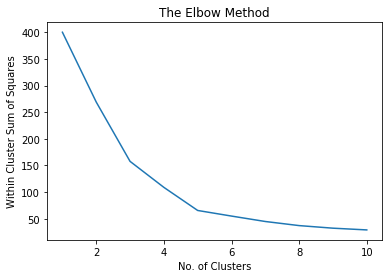

In [65]:
#Visualizing the ELBOW method to get the optimal value of K 
lp = sns.lineplot(x=range(1,11),y=wcss)
lp.set(title='The Elbow Method',xlabel='No. of Clusters',ylabel='Within Cluster Sum of Squares')

In [66]:
# Running KMeans for 5 clusters
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', n_init = 50, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X1)

In [67]:
# Cluster Sizes
cluster, count = np.unique(y_kmeans, return_counts=True)
dict(zip(cluster, count))

{0: 35, 1: 81, 2: 39, 3: 22, 4: 23}

In [68]:
Cluster = pd.Series(y_kmeans,name='Clus')
df_final = pd.concat([X,Cluster],axis=1)

[Text(0,0.5,'Spending Score (1-100)'),
 Text(0.5,0,'Annual Income (k$)'),
 Text(0.5,1,'Clusters of customers')]

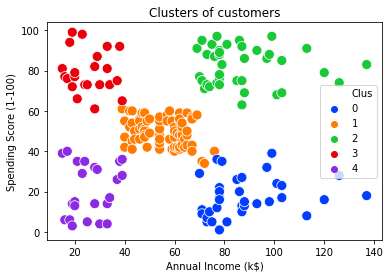

In [69]:
palette = sns.color_palette("bright", 5)
sp = sns.scatterplot(x=df_final['Annual Income (k$)'],y=df_final['Spending Score (1-100)'],hue=df_final['Clus'],s=100,legend='full',palette=palette)
sp.set(title='Clusters of customers',xlabel='Annual Income (k$)',ylabel='Spending Score (1-100)')